In [4]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# 경로 설정
chat_dir = '/content/gdrive/My Drive/Colab Notebooks/충북대 AI특강/실습 파일/pytest/data/'

In [6]:
print(chat_dir)

/content/gdrive/My Drive/Colab Notebooks/충북대 AI특강/실습 파일/pytest/data/


# 1.형태소 분석

In [7]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1
!pip install rhinoMorph

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [8]:
# 데이터 읽기 함수 정의
def read_data(filename, encoding='cp949'):
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
  return data

In [9]:
# 형태소분석기 준비
import rhinoMorph
rn = rhinoMorph.startRhino()         # 형태소분석기 기동

data = read_data(chat_dir+'data.txt', encoding='cp949')

print('자료 타입:', type(data))
print('전체 문장수:', len(data))
print('형태소 분석 전 모습:', data[:20])

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
자료 타입: <class 'list'>
전체 문장수: 6322
형태소 분석 전 모습: [['저희 안경원 코드 번호 확인이 가능할까요?', '매장코드'], ['저희 안경원 코드를 잊어버렸습니다', '매장코드'], ['안경원 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['매장 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['안경원 코드번호 확인하는 방법이 있을까요?', '매장코드'], ['안경원 코드번호 조회부탁드립니다', '매장코드'], ['저희 안경원 코드 확인부탁드려요', '매장코드'], ['안경원 코드 번호를 잊어버렸어요 확인부탁드려요', '매장코드'], ['안경원 코드 번호 확인을 어디에서 확인 할 수 있나요?', '매장코드'], ['저희 안경원 코드 어떻게 확인 할 수 있나요?', '매장코드'], ['저희 매장 코드 번호 확인하고싶어요', '매장코드'], ['매장 코드 번호 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 조회는 어디에서 할 수 있나요?', '매장코드'], ['매장 코드 번호 어떻게 알 수 있나요?', '매장코드'], ['매장 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['코드번호 까먹었습니다', '매장코드'], ['코드번호 잊어버렸습니다', '매장코드'], ['코드번호 잊어버렸을땐 어떻게 해야하죠?', '매장코드'], ['매장 코드 번호 잊어버렸습니다 어떻게 확인하죠?', '매장코드']]


In [13]:
# data 내용 형태소 분석
with open(chat_dir+'data_morphed.txt', 'w', encoding='utf-8') as f:
    for data_each in data:
        morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[0], pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'VX', 'XR', 'IC', 'MM', 'MAG'])
        print("morphed_data_each:", morphed_data_each)
        joined_data_each = ' '.join(morphed_data_each)
        if joined_data_each:
            f.write(joined_data_each + '\t' + data_each[1] + '\n')
    print('Morphological Analysis Completed.')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
morphed_data_each: ['어떤', '제품', '교환', '확인', '부탁', '드리']
morphed_data_each: ['교환', '신청', '내역', '조회', '부탁', '드리']
morphed_data_each: ['교환', '신청', '내역', '조회', '주']
morphed_data_each: ['교환', '신청', '내역', '조회', '어디', '하']
morphed_data_each: ['교환', '내역', '조회', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '있']
morphed_data_each: ['교환', '내역', '조회', '하', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '있']
morphed_data_each: ['교환', '내역', '조회', '있']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '어떻하', '하', '수', '있']
morphed_data_each: ['교환', '내역', '조회', '어떻하

In [14]:
print("연결된 마지막 문장: ", joined_data_each)
print("마지막 문장의 라벨: ", data_each[1])

연결된 마지막 문장:  제품 배송비 없 주문 금액 얼마
마지막 문장의 라벨:  배송비


# 2.훈련데이터와 테스트데이터 분리

In [15]:
def write_data_list(list, filename, encoding):
    """리스트 변수를 위한 쓰기 함수"""
    with open(chat_dir+filename, 'w') as f:
        for item in list:
            f.write('%s\t%s\n' % (item[0], item[1]))

In [16]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

data = read_data(chat_dir+'data_morphed.txt', encoding='utf-8')
train, test = train_test_split(data, test_size=0.2)

write_data_list(list=train, filename='train_data_morphed.txt', encoding='utf-8')
write_data_list(list=test, filename='test_data_morphed.txt', encoding='utf-8')

In [17]:
# 훈련 데이터 읽기
data = read_data(chat_dir+'train_data_morphed.txt', encoding='utf-8')
print('train length:', len(data))

texts = [line[0] for line in data]                      # 훈련데이터 본문
labels = [line[1] for line in data]                     # 훈련데이터 레이블 부분

train length: 5057


In [18]:
# 테스트 데이터 읽기
data_val = read_data(chat_dir+'test_data_morphed.txt', encoding='utf-8')
print('test length:', len(data_val))

texts_val = [line[0] for line in data_val]          # 테스트 데이터 본문
labels_val = [line[1] for line in data_val]         # 테스트 데이터 label 부분

test length: 1265


## 3.데이터 변환

In [19]:
# 문자를 숫자로 변환하는 Tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 1000                                  # 데이터셋에서 가장 빈도 높은 n개의 단어만 사용한다
maxlen = 20                                       # 각 문장의 길이를 고정시킨다.

tokenizer = Tokenizer(num_words=max_words)        # 상위빈도 1,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts)                     # 단어 인덱스를 구축한다
word_index = tokenizer.word_index                 # 단어 인덱스만 가져온다

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ',word_index)

전체에서 219개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '확인': 2, '어떻하': 3, '있': 4, '제품': 5, '반품': 6, '교환': 7, '어디': 8, '가능': 9, '주': 10, '조회': 11, '달': 12, '이번': 13, '수': 14, '배송': 15, '주문': 16, '영업': 17, '내역': 18, '되': 19, '샘플': 20, '알리': 21, '신청': 22, '언제': 23, '번호': 24, '싶': 25, '개봉': 26, '마감일': 27, '회수': 28, '담당': 29, '도착': 30, '당일': 31, '알': 32, '상품': 33, '금액': 34, '코드': 35, '받': 36, '시간': 37, '드리': 38, '배송비': 39, '연락처': 40, '궁금': 41, '부탁': 42, '대상': 43, '사원': 44, '지': 45, '일정': 46, '저희': 47, '얼마': 48, '정하': 49, '매장': 50, '방법': 51, '방문': 52, '보': 53, '없이': 54, '한가': 55, '안경원': 56, '여부': 57, '품목': 58, '갯수': 59, '요청': 60, '수량': 61, '개수': 62, '담당자': 63, '환불': 64, '능': 65, '소비자': 66, '자': 67, '날짜': 68, '공급가': 69, '청구': 70, '이상': 71, '얼마나': 72, '서': 73, '수령': 74, '청구서': 75, '한': 76, '문의': 77, '전화': 78, '대금': 79, '법': 80, '않': 81, '통화': 82, '동일': 83, '없': 84, '서해': 85, '이력': 86, '는지': 87, '같': 88, '일자': 89, '그룹': 90, '확': 91, '저번': 92, '포장': 93, '지궁': 94, '바꾸': 

In [20]:
# Tokenizing 결과 확인
# 상위 빈도 1,000(max_words)개의 단어만 word_index의 숫자 리스트로 변환
# Tokenizer 결과가 여기서 반영된다.
data = tokenizer.texts_to_sequences(texts)
print("data:", data)

len_d = [len(d) for d in data]
print("최대 문장 길이: ", max(len_d))
print("최소 문장 길이: ", min(len_d))

data: [[7, 86, 11, 4], [7, 98, 68, 3, 2], [6, 28, 46, 23], [17, 63, 40, 2, 3, 1], [5, 16, 1, 15, 11, 3, 1], [5, 69, 66, 2, 3, 1, 4], [31, 15, 5, 30, 37, 3, 2, 4], [8, 7, 18, 11, 1, 14, 4], [13, 12, 6, 27, 2, 3, 1], [5, 7, 9, 58, 26, 1, 5, 113, 19, 4, 2, 42, 38], [13, 12, 20], [56, 35, 24, 2, 3, 1, 14, 4], [39, 105, 45, 81, 72, 16, 1, 1], [17, 44, 52, 60, 3, 1], [17, 29, 24, 2, 3, 1, 19], [13, 12, 20, 114], [6, 27, 8, 2], [13, 12, 20, 62, 8, 2, 1], [7, 27, 32, 25], [13, 12, 70, 34, 8, 2], [13, 12, 70, 18, 124, 19], [26, 1, 5, 7, 3, 1, 1], [111, 5, 69, 66, 2, 25], [64, 34, 3, 19], [6, 9, 33, 3, 2, 4, 41], [6, 28, 23, 1], [6, 22, 18, 8, 2], [17, 44, 82, 3, 1, 1], [5, 7, 3, 1, 4], [7, 27, 2, 42, 38], [6, 28, 23], [31, 15, 5, 128, 23, 30, 1], [6, 28, 46, 8, 2], [7, 18, 11, 3, 1, 4], [17, 44, 40, 3, 32, 14, 4], [6, 18, 11, 3, 2, 14, 45, 32, 10], [26, 5, 7, 25, 8, 1, 4], [13, 12, 20, 59, 8, 2, 1, 4], [6, 34, 41], [5, 74, 142], [7, 65, 5, 2, 3, 1, 19], [5, 7, 3, 1], [13, 12, 20, 59, 8, 2], [7,

In [21]:
print(len_d)

[4, 5, 4, 6, 7, 7, 8, 7, 7, 13, 3, 8, 8, 6, 7, 4, 4, 7, 4, 6, 6, 7, 6, 4, 7, 4, 5, 6, 5, 5, 3, 7, 5, 6, 7, 9, 7, 8, 3, 3, 7, 4, 6, 10, 7, 6, 3, 5, 8, 6, 5, 8, 6, 4, 7, 4, 9, 7, 6, 8, 6, 3, 5, 6, 9, 8, 8, 6, 11, 8, 7, 6, 7, 8, 7, 8, 4, 7, 10, 6, 8, 7, 8, 5, 7, 7, 5, 7, 7, 7, 5, 6, 5, 8, 7, 5, 6, 9, 9, 8, 8, 10, 7, 8, 6, 6, 6, 8, 5, 4, 4, 7, 8, 7, 10, 8, 6, 7, 8, 7, 6, 7, 7, 4, 7, 9, 4, 7, 8, 5, 7, 7, 6, 5, 4, 9, 5, 8, 9, 6, 7, 6, 4, 6, 5, 7, 5, 5, 6, 7, 7, 9, 7, 5, 6, 9, 8, 8, 8, 6, 6, 6, 5, 6, 7, 4, 6, 6, 7, 7, 7, 7, 7, 6, 5, 7, 6, 7, 8, 6, 7, 7, 7, 4, 5, 7, 7, 6, 6, 8, 5, 4, 4, 7, 6, 7, 6, 7, 6, 4, 6, 6, 5, 6, 6, 6, 6, 7, 7, 4, 5, 6, 7, 5, 6, 6, 6, 6, 6, 9, 5, 14, 5, 6, 5, 5, 6, 8, 6, 7, 5, 10, 5, 6, 4, 6, 8, 6, 18, 6, 9, 7, 5, 3, 6, 6, 6, 7, 7, 4, 8, 5, 7, 6, 5, 8, 10, 6, 9, 6, 7, 6, 5, 6, 6, 4, 6, 7, 6, 5, 6, 6, 5, 6, 5, 9, 8, 2, 7, 6, 7, 6, 7, 7, 6, 6, 6, 4, 4, 6, 8, 6, 7, 7, 10, 5, 6, 5, 6, 6, 6, 7, 5, 4, 6, 7, 8, 6, 5, 6, 5, 7, 10, 4, 4, 8, 8, 5, 7, 5, 4, 6, 6, 6, 6, 6, 6, 4, 4, 

In [22]:
# data 패딩
# 길이를 고정시킨다. maxlen의 수만큼으로 2D 텐서를 만든다. 200을 넘는 데이터는 잘라내고, 모자라는 데이터는 0으로 채운다
data = pad_sequences(data, maxlen=maxlen)

data_val = tokenizer.texts_to_sequences(texts_val)
data_val = pad_sequences(data_val, maxlen=maxlen)

In [23]:
print

<function print>

In [24]:
print('data type:', type(data))
print('data length:', len(data))
print('texts 0:', texts[0])
print('data 0:', data[0])

data type: <class 'numpy.ndarray'>
data length: 5057
texts 0: 교환 이력 조회 있
data 0: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 86 11  4]


In [25]:
# 원-핫 인코딩 함수
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [26]:
data = to_one_hot(data, dimension=max_words) 
data_val = to_one_hot(data_val, dimension=max_words) 

print('data type:', type(data))
print('data length:', len(data))
print('texts 0:', texts[0])
print('data 0:', data[0])

data type: <class 'numpy.ndarray'>
data length: 5057
texts 0: 교환 이력 조회 있
data 0: [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [27]:
# 문자열 label을 숫자형 변수로 치환하는 함수
def labelToIint(labels):
    for count, label in enumerate(labels):
        if label == "배송비":
            labels[count] = 0
        elif label == "담당자문의":
            labels[count] = 1
        elif label == "제품가격":
            labels[count] = 2
        elif label == "배송문의":
            labels[count] = 3
        elif label == "매장코드":
            labels[count] = 4
        elif label == "샘플문의":
            labels[count] = 5
        elif label == "제품불일치":
            labels[count] = 6
        elif label == "반품문의":
            labels[count] = 7
        elif label == "교환문의":
            labels[count] = 8
        elif label == "청구금액":
            labels[count] = 9
    return labels

In [28]:
# 훈련데이터와 테스트데이터의 label을 숫자로 치환
print("훈련데이터 label 치환 전:\n", labels)
labels = labelToIint(labels)
print("치환 후:", labels)

print("\n테스트데이터 label 치환 전:\n", labels_val)
labels_val = labelToIint(labels_val)
print("치환 후:", labels_val)

훈련데이터 label 치환 전:
 ['교환문의', '교환문의', '반품문의', '담당자문의', '배송문의', '제품가격', '배송문의', '교환문의', '반품문의', '교환문의', '샘플문의', '매장코드', '배송비', '담당자문의', '담당자문의', '샘플문의', '반품문의', '샘플문의', '교환문의', '청구금액', '청구금액', '교환문의', '제품가격', '반품문의', '반품문의', '반품문의', '반품문의', '담당자문의', '교환문의', '교환문의', '반품문의', '배송문의', '반품문의', '교환문의', '담당자문의', '반품문의', '교환문의', '샘플문의', '반품문의', '배송문의', '교환문의', '교환문의', '샘플문의', '교환문의', '배송문의', '반품문의', '교환문의', '담당자문의', '교환문의', '배송비', '담당자문의', '교환문의', '샘플문의', '교환문의', '반품문의', '교환문의', '샘플문의', '반품문의', '교환문의', '배송문의', '매장코드', '제품가격', '반품문의', '교환문의', '청구금액', '반품문의', '제품가격', '청구금액', '제품불일치', '반품문의', '배송문의', '배송문의', '배송문의', '샘플문의', '반품문의', '매장코드', '교환문의', '담당자문의', '배송문의', '매장코드', '반품문의', '청구금액', '배송문의', '교환문의', '매장코드', '교환문의', '교환문의', '반품문의', '배송문의', '교환문의', '배송문의', '배송문의', '샘플문의', '교환문의', '교환문의', '제품불일치', '반품문의', '샘플문의', '담당자문의', '반품문의', '청구금액', '배송문의', '반품문의', '반품문의', '반품문의', '샘플문의', '담당자문의', '반품문의', '반품문의', '반품문의', '반품문의', '샘플문의', '배송문의', '반품문의', '반품문의', '교환문의', '배송비', '제품가격', '샘플문의', '담당자문의', '교환문의', '교

In [29]:
# label을 원-핫 인코딩 한다
class_number = 10                                 # 분류할 클래스의 수

labels = to_one_hot(labels, dimension=class_number)  
print(labels)

labels_val = to_one_hot(labels_val, dimension=class_number)
print(labels_val)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [30]:
# Train 데이터와 Test 데이터 준비
print('데이터 텐서의 크기:', data.shape)          
print('레이블 텐서의 크기:', labels.shape)        

x_train = data                         
y_train = labels                    
x_val = data_val
y_val = labels_val

데이터 텐서의 크기: (5057, 1000)
레이블 텐서의 크기: (5057, 10)


# 4. 모델 구성

In [31]:
epochs = 5                                        # 수행할 에포크의 수
batch_size = 32                                   # 한 번에 훈련할 배치 사이즈
model_name = 'train_data_morphed.h5'              # 저장될 모델의 이름
tokenizer_name = 'train_data_morphed.pickle'      # 저장될 토크나이저의 이름

In [32]:
# Define Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()        # 모델을 새로 정의

model.add(Dense(64, activation='relu', input_shape=(max_words,)))	              # 첫 번째 은닉층
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 66,474
Trainable params: 66,474
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [34]:
# Train Model
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련
# 훈련 데이터로 훈련하고, 검증 데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)
history_dict = history.history

Epoch 1/5
159/159 [==============================] - 17s 16ms/step - loss: 1.4592 - acc: 0.6044 - val_loss: 0.1339 - val_acc: 0.9644
Epoch 2/5
159/159 [==============================] - 0s 3ms/step - loss: 0.0662 - acc: 0.9923 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 3/5
159/159 [==============================] - 0s 3ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 9.5488e-04 - val_acc: 1.0000
Epoch 4/5
159/159 [==============================] - 0s 3ms/step - loss: 8.0562e-04 - acc: 1.0000 - val_loss: 8.5504e-04 - val_acc: 1.0000
Epoch 5/5
159/159 [==============================] - 0s 3ms/step - loss: 1.1808e-04 - acc: 1.0000 - val_loss: 5.8268e-05 - val_acc: 1.0000


In [35]:
# Save Model
# 만들어진 모델을 이후에 재사용할 수 있도록 저장한다
import pickle

model.save(model_name)

with open(tokenizer_name, 'wb') as file:            # 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장(같은 단어를 추출하게 한다)
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)

# 5. 모델 성능 확인

In [36]:
# Accuracy & Loss
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Validation accuracy of each epoch: [0.964 1.    1.    1.    1.   ]


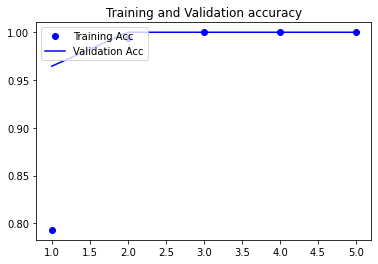

In [37]:
# Plotting Performance
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend(loc=2)

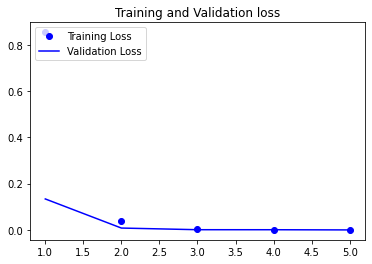

In [38]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=2)
plt.show()

In [39]:
# Load Model
from tensorflow.keras.models import load_model

loaded_model = load_model(model_name)

with open(tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [40]:
# 라벨을 답변으로 치환하는 함수
def intToLabel(label_int):
    labels = ''
    if label_int == 0:
        labels = '20,000원 이상 주문하시면 배송비가 없습니다'
    elif label_int == 1:
        labels = '담당자는 홈페이지에 직원의 이름 또는 사번을 넣으시면 자세한 정보를 알 수 있습니다'
    elif label_int == 2:
        labels = '공급가와 소비자가는 홈페이지 > 직원 ID 로그인 > 물품명 > 가격조회 에서 확인 가능합니다'
    elif label_int == 3:
        labels = '배송에는 보통 2일이 소요되며, 빠른 배송을 선택하시면 1일 안에 책임배달합니다'
    elif label_int == 4:
        labels = '매장 코드는 홈페이지 > 매장정보 에서 확인 가능합니다'
    elif label_int == 5:
        labels = '샘플신청은 홈페이지 > 직원 ID 로그인 > 물품명 > 샘플신청 에서 가능합니다'
    elif label_int == 6:
        labels = '다른 제품이 배송되어 죄송합니다. 홈페이지 > 물품명 > 환불신청 또는 전화 상담 부탁드립니다'
    elif label_int == 7:
        labels = '배송받으신 모든 제품은 7일 안에는 반품이 가능합니다. 홈페이지 > 물품명 > 환불신청 에서 반품 가능합니다'
    elif label_int == 8:
        labels = '배송받으신 모든 제품은 7일 안에는 교환이 가능합니다. 홈페이지 > 물품명 > 교환신청 에서 교환 가능합니다'
    elif label_int == 9:
        labels = '청구금액은 매달 12일 이후에 홈페이지 > 직원 ID 로그인 > 청구금액에서 확인 가능합니다'
    return labels

In [43]:
# 1문장 예측
user_input = input("내용을 입력하세요: ")
morphed_input, poses = rhinoMorph.wholeResult_list(rn, user_input, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC', 'JKV', 'EF', 'SF'])
text = [morphed_input]

data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)

predictions = loaded_model.predict(x_test)
label_int = np.argmax(predictions)
label = intToLabel(label_int)
print(label)

내용을 입력하세요: 언제와요?
배송에는 보통 2일이 소요되며, 빠른 배송을 선택하시면 1일 안에 책임배달합니다


In [46]:
predictions #질문 유형 분류 (0~9, e-다음 숫자가제일 적은것이 좋은것)

array([[1.2070661e-03, 5.7344469e-03, 1.7793245e-03, 9.7564656e-01,
        5.3409522e-04, 1.5781261e-04, 1.3058737e-02, 6.4246771e-05,
        1.7304727e-03, 8.7291308e-05]], dtype=float32)